In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

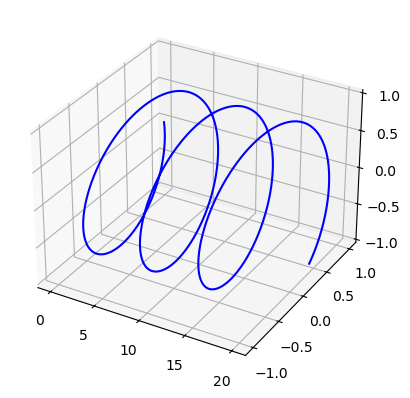

In [2]:
def system(t, variables):
    x, y = variables
    dxdt = y
    dydt = -x
    return [dxdt, dydt]

# Resolver el sistema de ecuaciones
solution = solve_ivp(system, [0,20], [1,0] ,t_eval=np.linspace(0, 20, 1000))
t = solution.t
x = solution.y[0]
y = solution.y[1]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Representación de la solución
ax.plot(t, x, y, 'b')

plt.show()


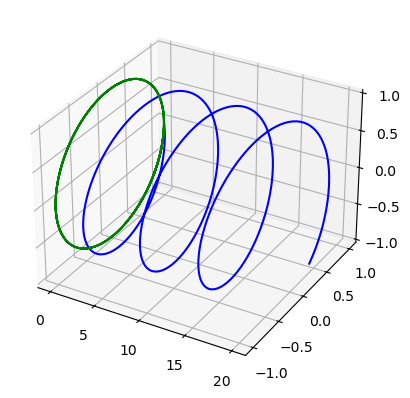

In [3]:
# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Representación de la solución
ax.plot(t, x, y, 'b')

# Representación de la órbita de las trayectorias en el plano xy
ax.plot(np.zeros_like(x), x, y, 'g')

plt.show()


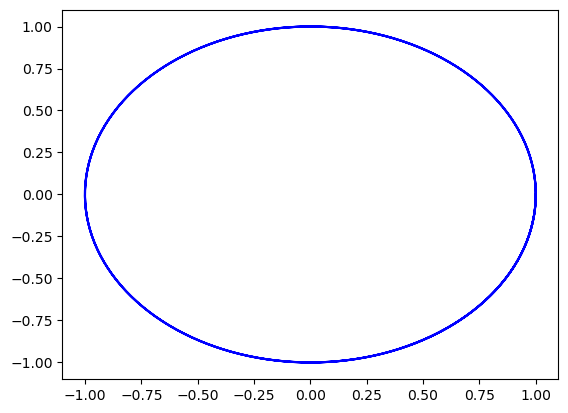

In [4]:
plt.plot(x, y, 'b')
plt.show()

Considérese el modelo depredador presa de Lokta-Volterra, para valores de los parámetros (a,b,c,d)=(2,0.75,4,0.75) y poblaciones iniciales en el ecosistema de 10 conejos y 5 zorros.

a) Obtener la órbita correspondiente a su solucion.

b) Representar orbitas correspondientes a otras dos soluciones adicionales



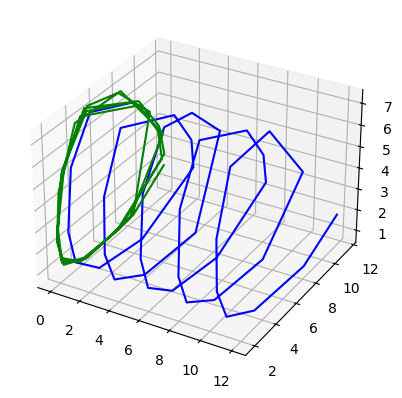

In [5]:
a, b, c, d = 2, 0.75, 4, 0.75
               
def eq(t, y):
    presas, depredadores = y
    return [ a * presas - b * presas * depredadores,
             -c * depredadores + d * presas * depredadores ]

sol = solve_ivp(eq, [0, 12], [10, 5], dense_output=True)

t = sol.t
x = sol.y[0]
y = sol.y[1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t, x, y, 'b')
ax.plot(np.zeros_like(x), x, y, 'g')
plt.show()

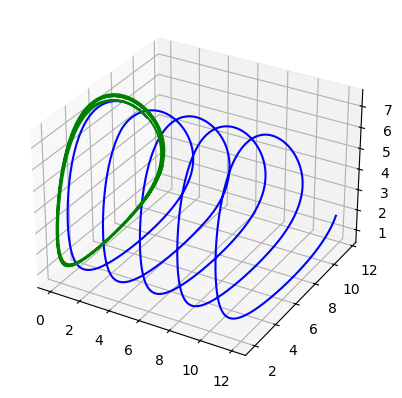

In [6]:
t = np.linspace(0, 12, 1001)
sol_dense = sol.sol(t)

x = sol_dense[0]
y = sol_dense[1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t, x, y, 'b')
ax.plot(np.zeros_like(x), x, y, 'g')
plt.show()

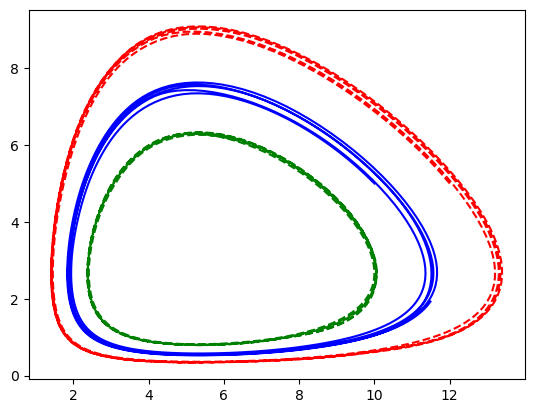

In [7]:
for ci, color, linestyle in [
        ( [10, 5], 'b', '-'),
        ( [12, 5], 'r', '--'), 
        ( [10, 3], 'g', '--'), 
]:
    sol = solve_ivp(eq, [0, 12], ci, dense_output=True)
    t = np.linspace(0, 12, 1001)
    sol_dense = sol.sol(t)
    x = sol_dense[0]
    y = sol_dense[1]

    plt.plot(x, y, color, linestyle=linestyle)
plt.show()

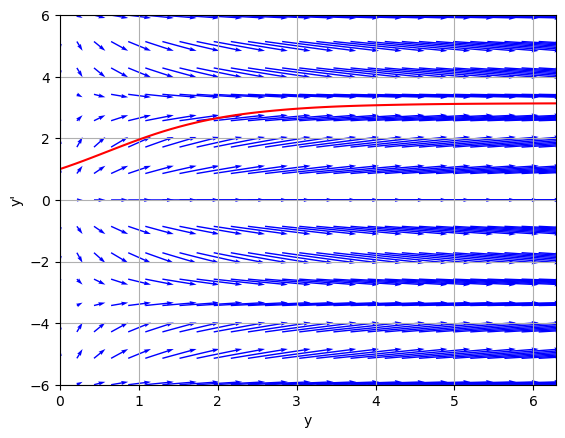

In [8]:
# Definir un mallado en el espacio (y, y')
y = np.linspace(0, 2 * np.pi, 30)
dy = np.linspace(-6, 6, 15)
Y, DY = np.meshgrid(y, dy)

# Calcular las derivadas
dY = np.sin(DY)

# Dibujar el campo de direcciones
plt.quiver(Y, DY, Y, dY, angles='xy', scale_units='xy', scale=3, color='b')
plt.xlabel('y')
plt.ylabel("y'")

plt.xlim(0, 2 * np.pi)
plt.ylim(-6, 6)
plt.grid()


def ec(t,y):
    return np.sin(y)

sol = solve_ivp(ec, [0,10], [0,1], dense_output = True)

t = np.linspace(0, 10, 100)
sol_dense = sol.sol(t)
x_val = sol_dense[0]  
y_val = sol_dense[1] 

plt.plot(t,sol_dense[1],'r')
plt.show()

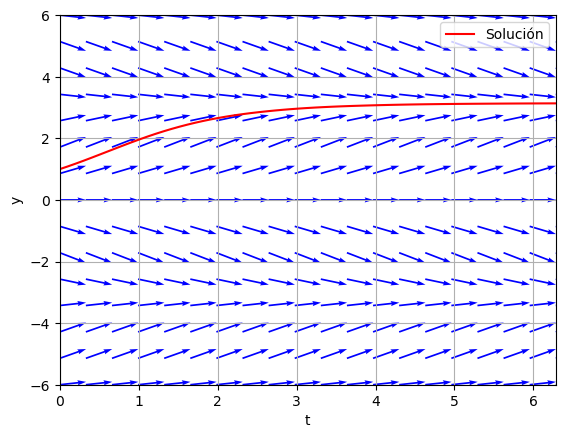

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir un mallado en el espacio (y, y')
# `y` es un rango de valores entre 0 y 2*pi dividido en 20 puntos
# `dy` es un rango de valores entre -6 y 6 dividido en 15 puntos
y = np.linspace(0, 2 * np.pi, 20)
dy = np.linspace(-6, 6, 15)

# Crear una malla a partir de `y` y `dy`, que define puntos en el espacio (y, y')
Y, DY = np.meshgrid(y, dy)

# Calcular las derivadas para el campo vectorial
# `dY` representa la derivada calculada como sin(DY)
dY = np.sin(DY)

# Dibujar el campo de direcciones usando quiver
# `quiver` dibuja un campo vectorial con:
# - X (Y): Posiciones iniciales de las flechas en el eje x (y)
# - Y (DY): Posiciones iniciales de las flechas en el eje y (dy)
# - U (Y): Componentes horizontales de los vectores
# - V (dY): Componentes verticales de los vectores
# Parámetros:
# - `angles='xy'` asegura que las flechas están en coordenadas cartesianas.
# - `scale_units='xy'` y `scale=3` ajustan el tamaño relativo de las flechas.
# - `color='b'` especifica el color azul para las flechas.
plt.quiver(Y, DY, np.ones_like(Y), dY, angles='xy', scale_units='xy', scale=3, color='b')

# Etiquetas para los ejes
plt.xlabel('t')
plt.ylabel("y")

# Limitar el rango de los ejes para la visualización
plt.xlim(0, 2 * np.pi)
plt.ylim(-6, 6)
plt.grid()  # Agregar una cuadrícula para mayor claridad

# Definir una ecuación diferencial
def ec(t, v):
    return [ np.sin(v[0]) ]

# Resolver la ecuación diferencial con condiciones iniciales [0, 1]
# `solve_ivp` resuelve el sistema en el intervalo de tiempo [0, 10]
# `dense_output=True` permite generar soluciones densas en el tiempo
sol = solve_ivp(ec, [0, 10], [1], dense_output=True)

# Generar datos densos para graficar la solución
t = np.linspace(0, 10, 100)  # Valores de tiempo igualmente espaciados
sol_dense = sol.sol(t)  # Solución evaluada en esos tiempos
y_val = sol_dense[0]  # Valores de y

# Graficar la solución de la ecuación diferencial
plt.plot(t, y_val, 'r', label='Solución')

# Mostrar la leyenda y el gráfico final
plt.legend()
plt.show()


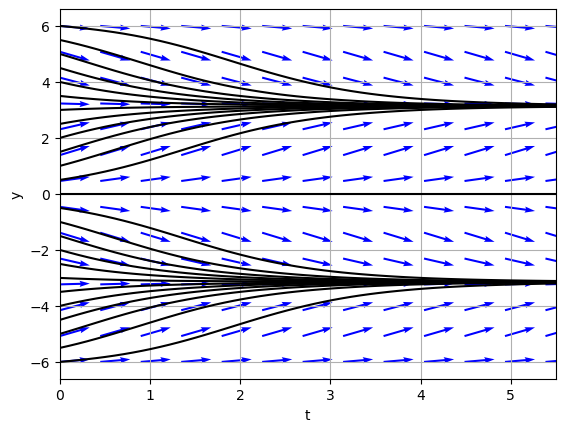

In [43]:
linspace_t = np.linspace(0, 2 * np.pi, 15)
linspace_y = np.linspace(-6, 6, 14)

meshgrid_t, meshgrid_y = np.meshgrid(linspace_t, linspace_y)

dt = np.ones_like(meshgrid_t)
dy = np.sin(meshgrid_y)

plt.quiver(meshgrid_t, meshgrid_y, dt, dy, angles='xy', scale_units='xy', scale=3, color='b')

plt.xlabel('t')
plt.ylabel('y')

plt.xlim(min(linspace_x) * 1.1, max(linspace_x) * 1.1)
plt.ylim(min(linspace_y) * 1.1, max(linspace_y) * 1.1)
plt.grid()

def ec(t, v):
    return [ np.sin(v[0]) ]

for ic in np.arange(-6, 6.1, .5):
    sol = solve_ivp(ec, [0, 10], [ic], dense_output=True)

    t = np.linspace(0, 10, 100)
    sol_dense = sol.sol(t)
    y_val = sol_dense[0]

    plt.plot(t, y_val, 'k', label=f"y(0) = {ic}")

#plt.legend()
plt.show()

Representar el campo de direcciones junto con alguna solución de la ecuación y′ = x − y**2

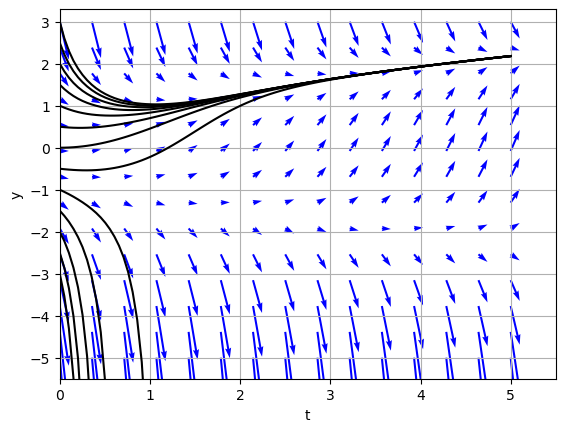

In [45]:
linspace_t = np.linspace(0, 5, 15)
linspace_y = np.linspace(-5, 3, 14)

meshgrid_t, meshgrid_y = np.meshgrid(linspace_t, linspace_y)

dt = np.ones_like(meshgrid_x)
dy = meshgrid_x - meshgrid_y ** 2

plt.quiver(meshgrid_t, meshgrid_y, dt, dy, angles='xy', scale_units='xy', scale=10, color='b')

plt.xlabel('t')
plt.ylabel('y')

plt.xlim(min(linspace_x) * 1.1, max(linspace_x) * 1.1)
plt.ylim(min(linspace_y) * 1.1, max(linspace_y) * 1.1)
plt.grid()

def ec(t, v):
    return [ t - v[0] ** 2 ]

for ic in np.arange(-3, 3.1, .5):
    sol = solve_ivp(ec, [0, 5], [ic], dense_output=True)

    t = np.linspace(0, 5, 100)
    sol_dense = sol.sol(t)
    y_val = sol_dense[0]

    plt.plot(t, y_val, 'k', label=f"y(0) = {ic}")

#plt.legend()
plt.show()


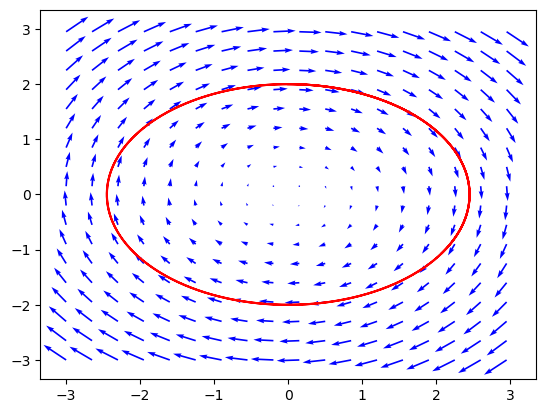

In [46]:
# Representación del campo de direcciones
X,Y = np.meshgrid(np.arange(-3,3,.35), np.arange(-3,3,.35))
U = 3*Y
V = -2*X
plt.quiver(X,Y,U,V, color='b')

plt.xlim(-3.35,3.35)
plt.ylim(-3.35,3.35)

# Representación de una órbita concreta
def sistema(t, variables):
    x, y = variables
    dxdt = 3*y
    dydt = -2*x
    return [dxdt, dydt]

sol = solve_ivp(sistema, [0,6], [0,2],dense_output = True)

t = np.linspace(0, 6, 1000)
sol_dense = sol.sol(t)
x_val = sol_dense[0]  
y_val = sol_dense[1] 
plt.plot(x_val, y_val,'r')

plt.show()

Representar el campo de direcciones del sistema del ejercicio 1.

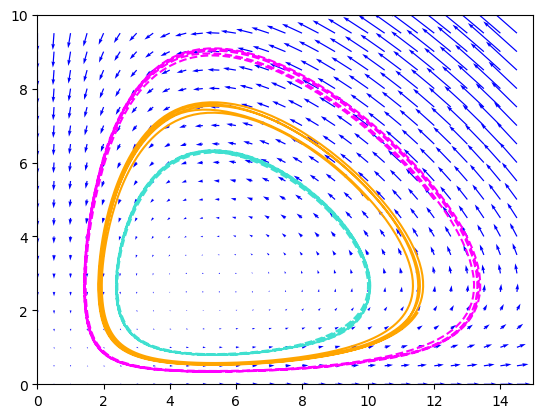

In [58]:
# Representación del campo de direcciones
X, Y = np.meshgrid(np.arange(0,15,.5), np.arange(0,10,.5))
U = a * X - b * X * Y
V = -c * Y + d * X * Y
plt.quiver(X, Y, U, V, color='b')

plt.xlim(0, 15)
plt.ylim(0, 10)

a, b, c, d = 2, 0.75, 4, 0.75
               
def eq(t, y):
    presas, depredadores = y
    return [ a * presas - b * presas * depredadores,
             -c * depredadores + d * presas * depredadores ]

for ci, color, linestyle in [
        ( [10, 5], 'orange', '-'),
        ( [12, 5], 'magenta', '--'), 
        ( [10, 3], 'turquoise', '--'), 
]:
    sol = solve_ivp(eq, [0, 12], ci, dense_output=True)
    t = np.linspace(0, 12, 1001)
    sol_dense = sol.sol(t)
    x = sol_dense[0]
    y = sol_dense[1]

    plt.plot(x, y, color, linestyle=linestyle)
plt.show()

(0.0, 10.0)

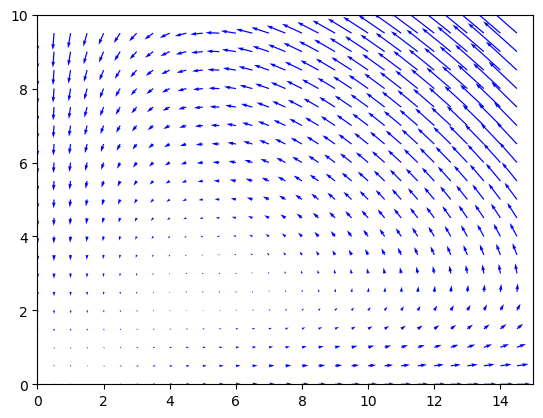

In [59]:
# Representación del campo de direcciones
X, Y = np.meshgrid(np.arange(0,15,.5), np.arange(0,10,.5))
U = a * X - b * X * Y
V = -c * Y + d * X * Y
plt.quiver(X, Y, U, V, color='b')

plt.xlim(0, 15)
plt.ylim(0, 10)

In [71]:
import numpy as np

# Introducir los datos que forman parte de la matrix (como objeto tipo numpy)
data = [[1,-4],[4,-7]]
AN=np.matrix(data)

# Cálculo de autovalores y autovectores con linalg
eigenvalues, eigenvectors = np.linalg.eig(AN)
print([np.round(v,6) for v in eigenvalues])

print(np.round(eigenvectors, 6))

[(-3+0j), (-3-0j)]
[[0.707107+0.j 0.707107-0.j]
 [0.707107+0.j 0.707107-0.j]]


Como resumen de la clasificación que se puede tener según los autovalores, en un sistema lineal plano:

λ1,λ2 ∈ R entonces:

* si son iguales -> impropio:

  + si son negativos -> atractivo

  + si son positivos -> repulsivo

* si son distintos -> nodo propio:

  + si son negativos -> atractivo (estable)

  + si son positivos -> repulsivo (inestable)

  + de signo distinto -> nodo silla de caballo

λ1,λ2 ∈ C entonces:

* si son conjugados, parte real negativa -> foco (espiral) atractiva

* si son conjugados, parte real positiva -> foco (espiral) repulsiva

* si son imaginarios puros -> centros

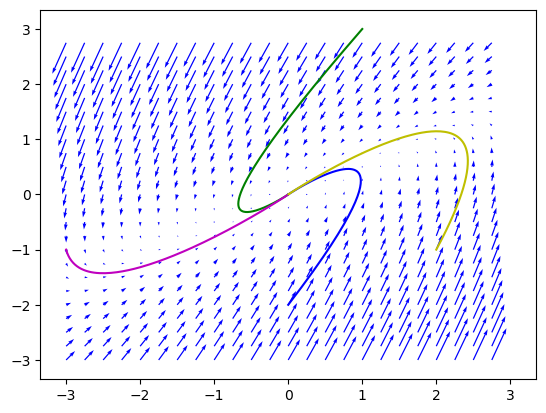

In [89]:
import matplotlib.pyplot as plt        

# Definición del mallado de coordenadas, cálculo de las pendientes en las componentes x,y. 
# Representación del campo de pendientes.
X,Y = np.meshgrid(np.arange(-3,3,.25), np.arange(-3,3,.25))
U = X - 4*Y
V = 4*X - 7*Y
plt.quiver(X,Y,U,V, color='b', scale=500)

plt.xlim(-3.35, 3.35)
plt.ylim(-3.35, 3.35)

def system(t, variables):
    x, y = variables
    dxdt = x - 4*y
    dydt = 4*x - 7*y
    return [dxdt, dydt]

# Resolución de 4 IVPs para representar 4 órbitas
solution  = solve_ivp(system, [0,12], [1, 3],  t_eval=np.linspace(0, 12, 1000))
solution2 = solve_ivp(system, [0,12], [-3, -1],t_eval=np.linspace(0, 12, 1000))
solution3 = solve_ivp(system, [0,12], [0, -2], t_eval=np.linspace(0, 12, 1000))
solution4 = solve_ivp(system, [0,12], [2, -1], t_eval=np.linspace(0, 12, 1000))

# Obtener las soluciones
t = solution.t
x = solution.y[0]
y = solution.y[1]
x2 = solution2.y[0]
y2 = solution2.y[1]
x3= solution3.y[0]
y3 = solution3.y[1]
x4= solution4.y[0]
y4 = solution4.y[1]

# Representación de las órbitas de las trayectorias
plt.plot(x,  y, 'g')
plt.plot(x2, y2, 'm')
plt.plot(x3, y3, 'b')
plt.plot(x4, y4, 'y')

plt.show()



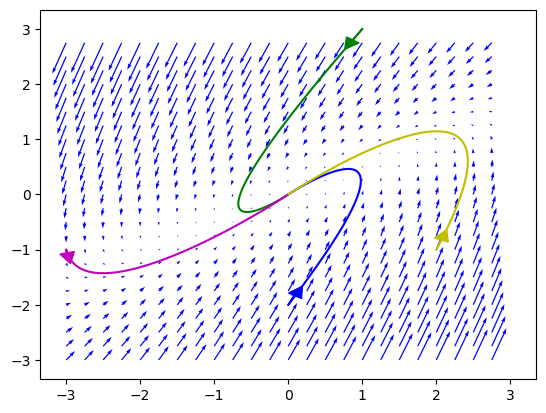

In [108]:
import matplotlib.pyplot as plt

# Definición del mallado de coordenadas, cálculo de las pendientes en las componentes x,y. 
# Representación del campo de pendientes.
X,Y = np.meshgrid(np.arange(-3,3,.25), np.arange(-3,3,.25))
U = X - 4*Y
V = 4*X - 7*Y
plt.quiver(X,Y,U,V, color='b', scale=500)

plt.xlim(-3.35, 3.35)
plt.ylim(-3.35, 3.35)

def system(t, variables):
    x, y = variables
    dxdt = x - 4*y
    dydt = 4*x - 7*y
    return [dxdt, dydt]

for ci, color in [
    ( [ 1,  3], 'g'),
    ( [-3, -1], 'm'),
    ( [ 0, -2], 'b'),
    ( [ 2, -1], 'y'),
]:
    solution  = solve_ivp(system, [0,12], ci,  t_eval=np.linspace(0, 12, 1000))
    t = solution.t
    x = solution.y[0]
    y = solution.y[1]
    plt.arrow(ci[0], ci[1], x[1] - x[0], y[1] - y[0], head_width=0.2, head_length=0.2, fc=color, ec=color)
    plt.plot(x, y, color)

plt.show()


In [109]:
from sympy import *

t = Symbol('t')

x = Function('x')(t)
y = Function('y')(t)

Eqs = [ x - 4*y, 4*x - 7*y]

sol_sistema = dsolve((Derivative(x,t) - Eqs[0], Derivative(y,t) - Eqs[1]))

print(sol_sistema)


[Eq(x(t), 4*C1*t*exp(-3*t) + (C1 + 4*C2)*exp(-3*t)), Eq(y(t), 4*C1*t*exp(-3*t) + 4*C2*exp(-3*t))]


(-2.2, 2.2)

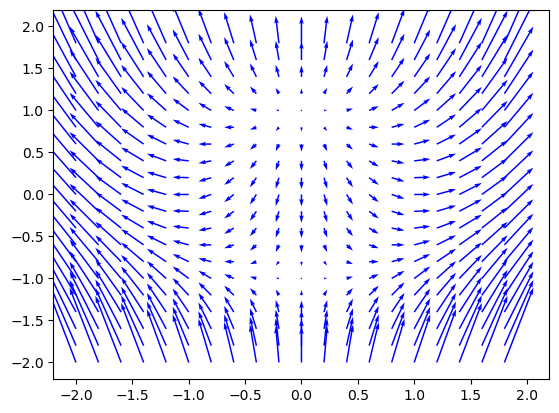

In [111]:
X,Y = np.meshgrid(np.arange(-2,2,.2),np.arange(-2,2,.2))
U = X
V = X**2 + Y**2 - 1

plt.quiver(X, Y, U, V, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-2.2, 2.2)
plt.ylim(-2.2, 2.2)


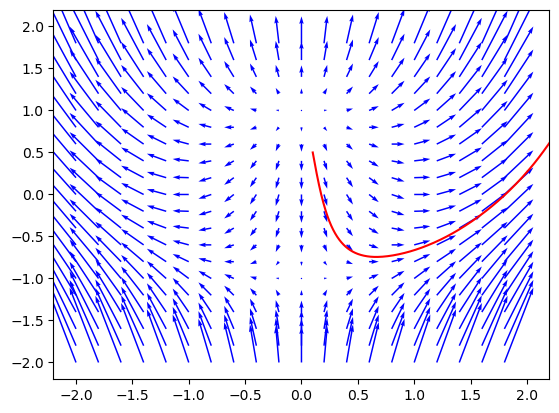

In [112]:
from scipy.integrate import solve_ivp

def system(t, variables):
    x, y = variables
    dxdt = x
    dydt = x**2 + y**2 - 1
    return [dxdt, dydt]

solution = solve_ivp(system, [0,5], [0.1, 0.5], t_eval=np.linspace(0, 5, 500))

t = solution.t
x = solution.y[0]
y = solution.y[1]

plt.plot(x, y, 'r')

plt.quiver(X,Y,U,V, color='b',angles='xy', scale_units='xy', scale=7 )
plt.xlim(-2.2,2.2)
plt.ylim(-2.2,2.2)
plt.show()


[(0, -1), (0, 1)]


<function matplotlib.pyplot.show(close=None, block=None)>

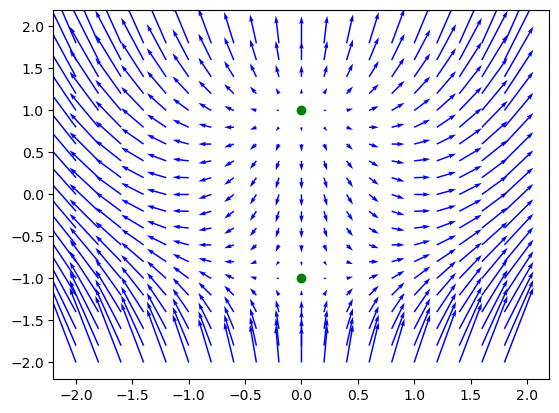

In [119]:
import sympy as sp

from sympy.abc import x, y
dxdt = x
dydt = x**2 + y**2 - 1

# Creamos como listas las ecuaciones y las variables para simplificar
eq = [dxdt, dydt]
variables = [x, y]

critical_points = sp.solve(eq, variables)
print(critical_points)

X,Y = np.meshgrid(np.arange(-2,2,.2),np.arange(-2,2,.2))
U = X
V = X**2 + Y**2 - 1

plt.quiver(X, Y, U, V, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-2.2, 2.2)
plt.ylim(-2.2, 2.2)

for critical_point in critical_points:
    plt.plot(critical_point[0], critical_point[1], 'og')

plt.show

In [118]:
# Se genera la matrix como simbólica para poder usar el método jacobian() 
jacobian_matrix = sp.Matrix([eq]).jacobian(variables)
sp.pprint(jacobian_matrix)

# Para sustituir el sistema linealizado, se intoducen los valores de los puntos críticos como diccionarios.
point1 = {x: 0, y: -1}
jacobian1 = jacobian_matrix.subs(point1)
print('Sistema linealizado en el punto crítico (0,-1)')
sp.pprint(jacobian1)

point2 = {x: 0, y: 1}
jacobian2 = jacobian_matrix.subs(point2)
print('Sistema linealizado en el punto crítico (0,1)')
sp.pprint(jacobian2)

⎡ 1    0 ⎤
⎢        ⎥
⎣2⋅x  2⋅y⎦
Sistema linealizado en el punto crítico (0,-1)
⎡1  0 ⎤
⎢     ⎥
⎣0  -2⎦
Sistema linealizado en el punto crítico (0,1)
⎡1  0⎤
⎢    ⎥
⎣0  2⎦


<function matplotlib.pyplot.show(close=None, block=None)>

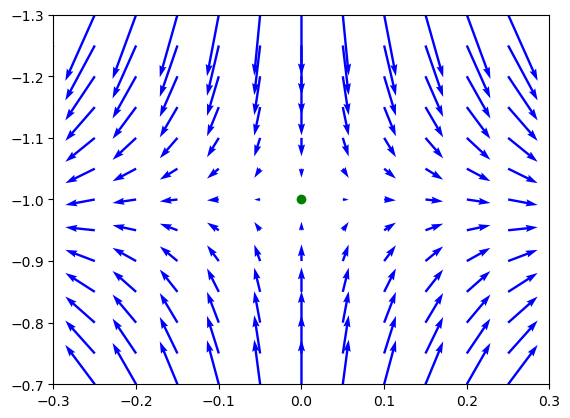

In [135]:
X, Y = np.meshgrid(np.arange(-.3, .3, .05),np.arange(-1.3, -0.7, .05))
DX = X
DY = X**2 + Y**2 - 1

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-.3, .3)
plt.ylim(-.7, -1.3)

plt.plot(0, -1, 'og')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

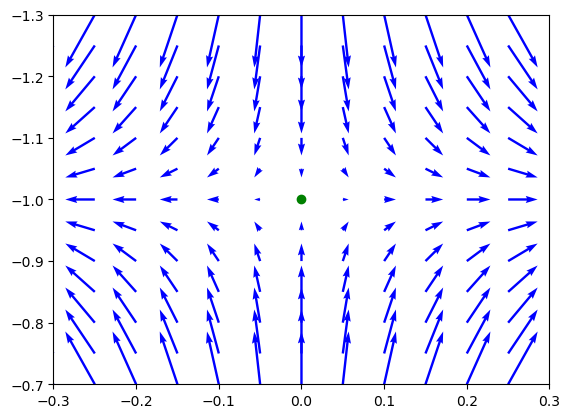

In [143]:
X, Y = np.meshgrid(np.arange(-.3, .3, .05),np.arange(-1.3, -0.7, .05))
DX = X
DY = -2 * (Y + 1)

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-.3, .3)
plt.ylim(-.7, -1.3)

plt.plot(0, -1, 'og')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

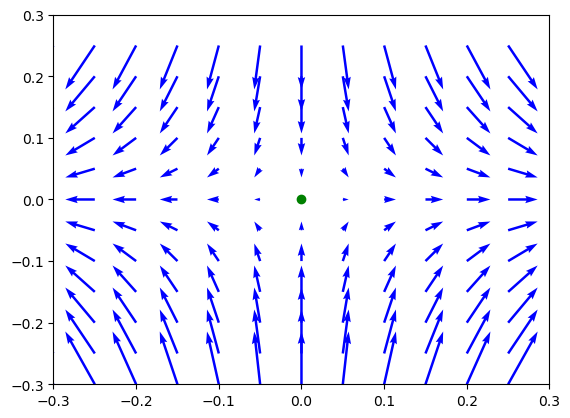

In [150]:
X, Y = np.meshgrid(np.arange(-.3, .3, .05),np.arange(-.3, .3, .05))
DX = X
DY = -2 * Y

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-.3, .3)
plt.ylim(-.3, .3)

plt.plot(0, 0, 'og')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

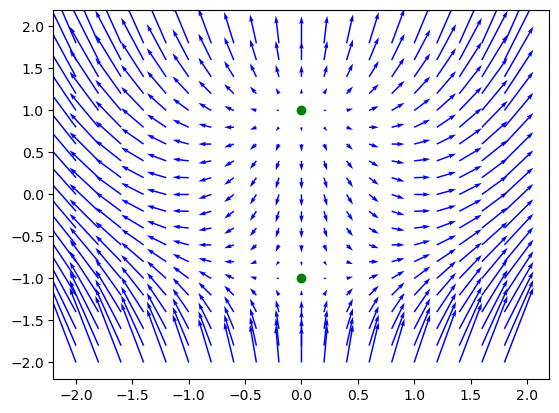

In [148]:
X,Y = np.meshgrid(np.arange(-2,2,.2),np.arange(-2,2,.2))
DX = X
DY = X**2 + Y**2 - 1

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-2.2, 2.2)
plt.ylim(-2.2, 2.2)

for critical_point in critical_points:
    plt.plot(critical_point[0], critical_point[1], 'og')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

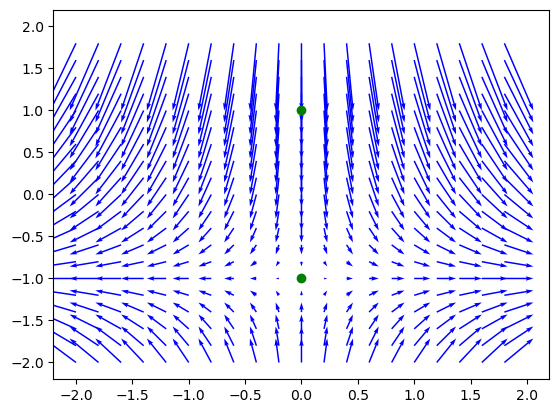

In [149]:
X,Y = np.meshgrid(np.arange(-2,2,.2),np.arange(-2,2,.2))
DX = X
DY = -2 * (Y + 1)

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-2.2, 2.2)
plt.ylim(-2.2, 2.2)

for critical_point in critical_points:
    plt.plot(critical_point[0], critical_point[1], 'og')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

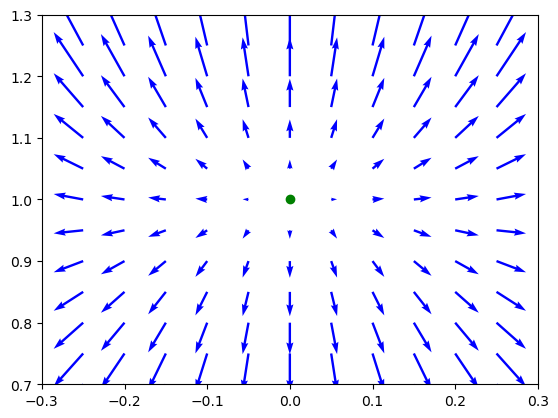

In [152]:
X, Y = np.meshgrid(np.arange(-.3, .3, .05),np.arange(0.7, 1.3, .05))
DX = X
DY = X**2 + Y**2 - 1

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-.3, .3)
plt.ylim(.7, 1.3)

plt.plot(0, 1, 'og')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

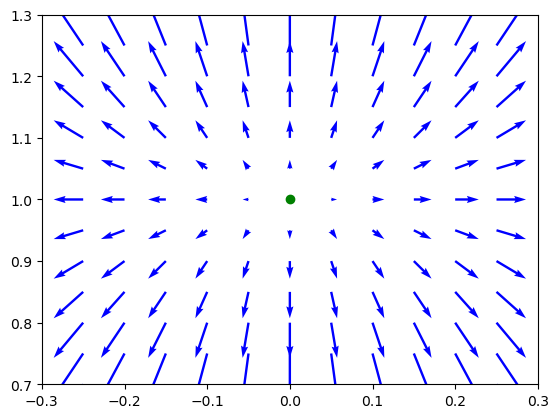

In [154]:
X, Y = np.meshgrid(np.arange(-.3, .3, .05),np.arange(0.7, 1.3, .05))
DX = X
DY = 2 * (Y - 1)

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-.3, .3)
plt.ylim(.7, 1.3)

plt.plot(0, 1, 'og')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

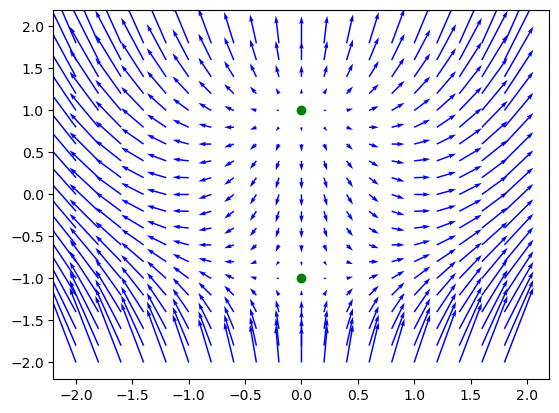

In [155]:
X,Y = np.meshgrid(np.arange(-2,2,.2),np.arange(-2,2,.2))
DX = X
DY = X**2 + Y**2 - 1

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-2.2, 2.2)
plt.ylim(-2.2, 2.2)

for critical_point in critical_points:
    plt.plot(critical_point[0], critical_point[1], 'og')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

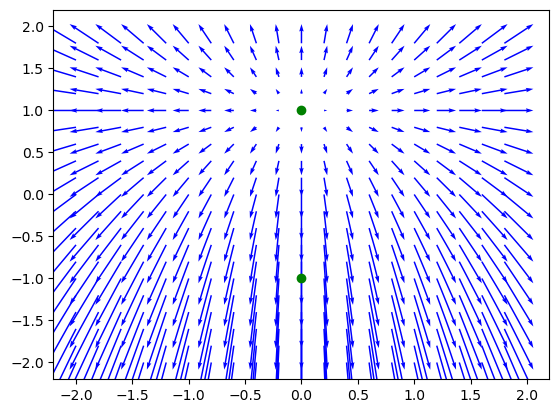

In [156]:
X,Y = np.meshgrid(np.arange(-2,2,.2),np.arange(-2,2,.2))
DX = X
DY = 2 * (Y - 1)

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-2.2, 2.2)
plt.ylim(-2.2, 2.2)

for critical_point in critical_points:
    plt.plot(critical_point[0], critical_point[1], 'og')

plt.show

dx(t)/dt = x(t) + 2y(t)

dy(t)/dt = −x(t) + y(t)


<function matplotlib.pyplot.show(close=None, block=None)>

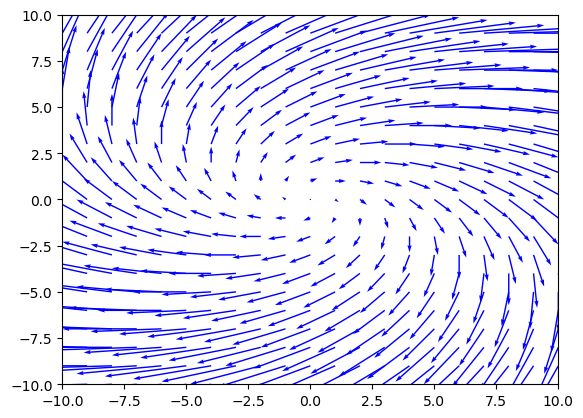

In [157]:
X,Y = np.meshgrid(np.arange(-10, 10.01, 1),np.arange(-10, 10.01, 1))
DX = X + 2*Y
DY = -X + Y

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=7 )

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show

In [159]:
data = [ [1, 2], [-1, 1] ]
AN=np.matrix(data)

eigenvalues, eigenvectors = np.linalg.eig(AN)
print([np.round(v,6) for v in eigenvalues])

#print(np.round(eigenvectors, 6))

[(1+1.414214j), (1-1.414214j)]


Como resumen de la clasificación que se puede tener según los autovalores, en un sistema lineal plano:

λ1,λ2 ∈ R entonces:

* si son iguales -> impropio:

  + si son negativos -> atractivo

  + si son positivos -> repulsivo

* si son distintos -> nodo propio:

  + si son negativos -> atractivo (estable)

  + si son positivos -> repulsivo (inestable)

  + de signo distinto -> nodo silla de caballo

λ1,λ2 ∈ C entonces:

* si son conjugados, parte real negativa -> foco (espiral) atractiva

* si son conjugados, parte real positiva -> foco (espiral) repulsiva

* si son imaginarios puros -> centros

dx(t)/dt = −x(t) * * 2 − 4y(t) * * 2 + 4

dy(t)/dt = −x(t) * * 2 + y(t) * * 2 + 1


In [166]:
x = sp.Symbol('x')
y = sp.Symbol('y')

dxdt = -x**2 - 4 * y**2 + 4
dydt = -x**2 + y**2 + 1

eq = [dxdt, dydt]
variables = [x, y]

critical_points = sp.solve(eq, variables)
print(critical_points)


[(-2*sqrt(10)/5, -sqrt(15)/5), (-2*sqrt(10)/5, sqrt(15)/5), (2*sqrt(10)/5, -sqrt(15)/5), (2*sqrt(10)/5, sqrt(15)/5)]


<function matplotlib.pyplot.show(close=None, block=None)>

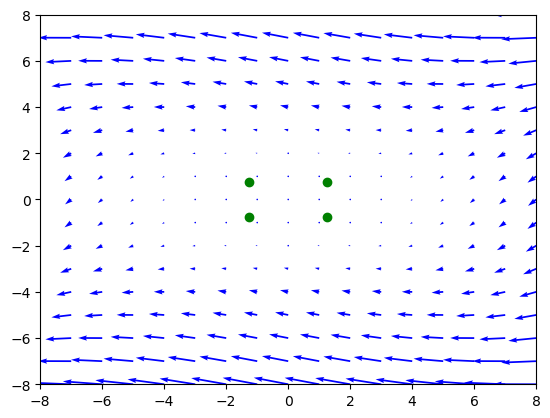

In [170]:
X,Y = np.meshgrid(np.arange(-8, 8.01, 1),np.arange(-8, 8.01, 1))

DX = -X**2 - 4 * Y**2 + 4
DY =  -X**2 + Y**2 + 1

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy')

plt.xlim(-8, 8)
plt.ylim(-8, 8)

for critical_point in critical_points:
    plt.plot(critical_point[0], critical_point[1], 'og')

plt.show

In [183]:
# Se genera la matrix como simbólica para poder usar el método jacobian() 
jacobian_matrix = sp.Matrix([eq]).jacobian(variables)
sp.pprint(jacobian_matrix)

for critical_point in critical_points:
    print(f"Jacobiano en {critical_point}")
    xc, yc = critical_point
    point = {x: xc, y: yc}
    
    # Sustituir el punto crítico en la matriz Jacobiana
    jacobian = jacobian_matrix.subs(point)
    sp.pprint(jacobian)
    
    # Convertir la matriz de SymPy a NumPy
    AN = np.array(jacobian.evalf().tolist(), dtype=float)

    print(f"Valores propios en {critical_point}")

    # Calcular valores propios y vectores propios
    eigenvalues, eigenvectors = np.linalg.eig(AN)
    print([np.round(v, 6) for v in eigenvalues])

⎡-2⋅x  -8⋅y⎤
⎢          ⎥
⎣-2⋅x  2⋅y ⎦
Jacobiano en (-2*sqrt(10)/5, -sqrt(15)/5)
⎡4⋅√10   8⋅√15 ⎤
⎢─────   ───── ⎥
⎢  5       5   ⎥
⎢              ⎥
⎢4⋅√10  -2⋅√15 ⎥
⎢─────  ───────⎥
⎣  5       5   ⎦
Valores propios en (-2*sqrt(10)/5, -sqrt(15)/5)
[4.944113, -3.963485]
Jacobiano en (-2*sqrt(10)/5, sqrt(15)/5)
⎡4⋅√10  -8⋅√15 ⎤
⎢─────  ───────⎥
⎢  5       5   ⎥
⎢              ⎥
⎢4⋅√10   2⋅√15 ⎥
⎢─────   ───── ⎥
⎣  5       5   ⎦
Valores propios en (-2*sqrt(10)/5, sqrt(15)/5)
[(2.039508+3.928909j), (2.039508-3.928909j)]
Jacobiano en (2*sqrt(10)/5, -sqrt(15)/5)
⎡-4⋅√10    8⋅√15 ⎤
⎢───────   ───── ⎥
⎢   5        5   ⎥
⎢                ⎥
⎢-4⋅√10   -2⋅√15 ⎥
⎢───────  ───────⎥
⎣   5        5   ⎦
Valores propios en (2*sqrt(10)/5, -sqrt(15)/5)
[(-2.039508+3.928909j), (-2.039508-3.928909j)]
Jacobiano en (2*sqrt(10)/5, sqrt(15)/5)
⎡-4⋅√10   -8⋅√15 ⎤
⎢───────  ───────⎥
⎢   5        5   ⎥
⎢                ⎥
⎢-4⋅√10    2⋅√15 ⎥
⎢───────   ───── ⎥
⎣   5        5   ⎦
Valores propios en (2*sqrt(10)/5, sqr

<function matplotlib.pyplot.show(close=None, block=None)>

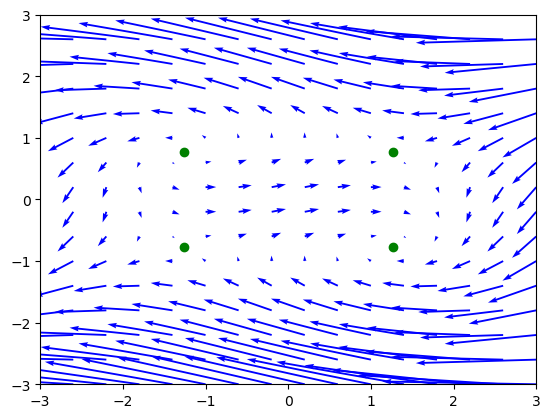

In [201]:
X,Y = np.meshgrid(np.arange(-3, 3.01, .4),np.arange(-3, 3.01, .4))

DX = -X**2 - 4 * Y**2 + 4
DY =  -X**2 + Y**2 + 1

plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=22)

plt.xlim(-3, 3)
plt.ylim(-3, 3)

for critical_point in critical_points:
    plt.plot(critical_point[0], critical_point[1], 'og')

plt.show

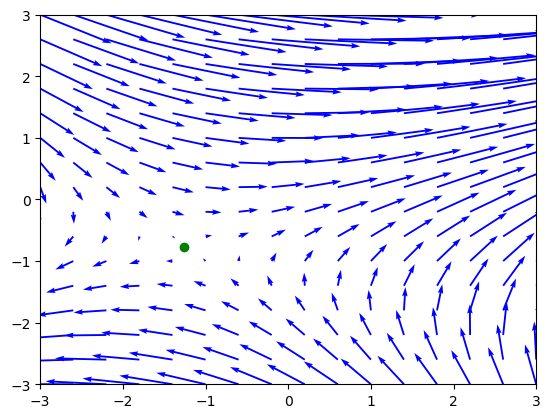

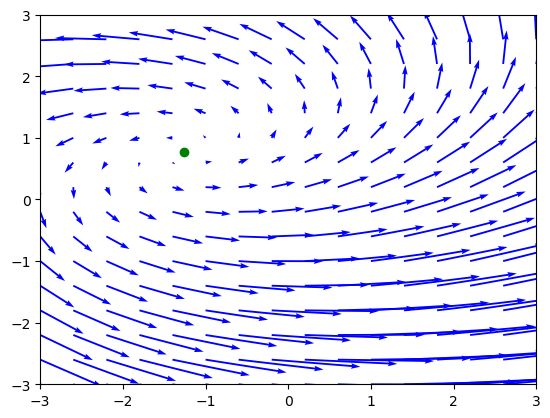

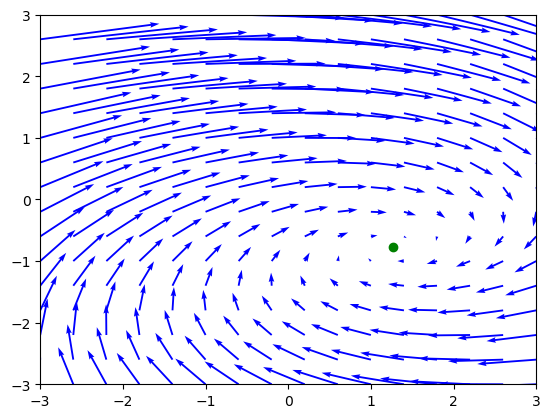

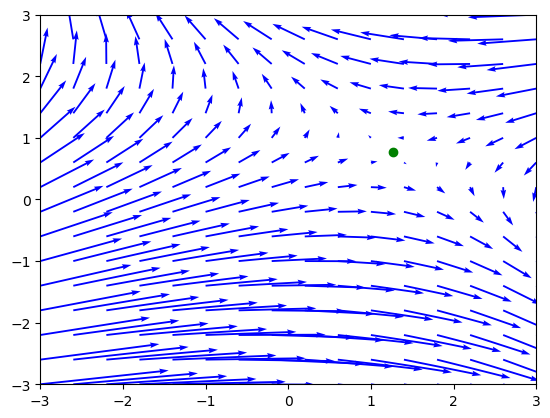

In [202]:
X,Y = np.meshgrid(np.arange(-3, 3.01, .4),np.arange(-3, 3.01, .4))

for critical_point in critical_points:
    plt.figure()

    xc, yc = critical_point
    point = {x: xc, y: yc}
    jacobian = jacobian_matrix.subs(point)
    AN = np.array(jacobian.evalf().tolist(), dtype=float)
    ((a11, a12), (a21, a22)) = AN

    DX = a11 * (X - float(xc)) + a12 * (Y - float(yc))
    DY = a21 * (X - float(xc)) + a22 * (Y - float(yc))

    plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=22)

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    plt.plot(critical_point[0], critical_point[1], 'og')
    plt.show


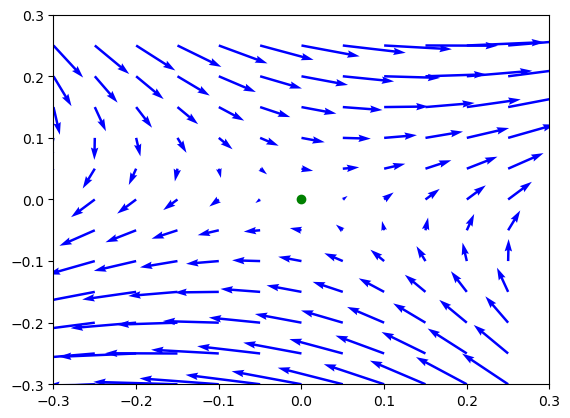

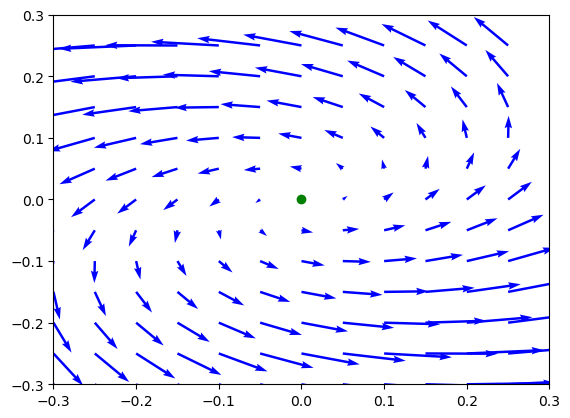

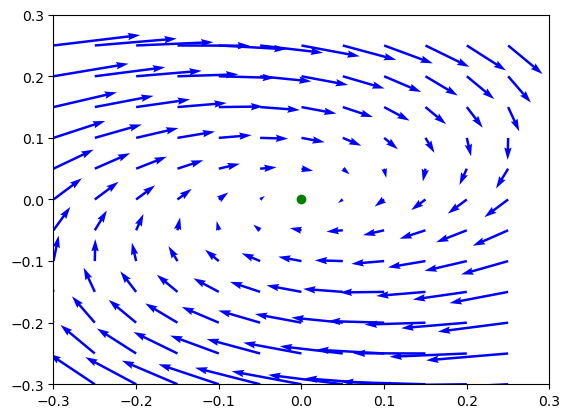

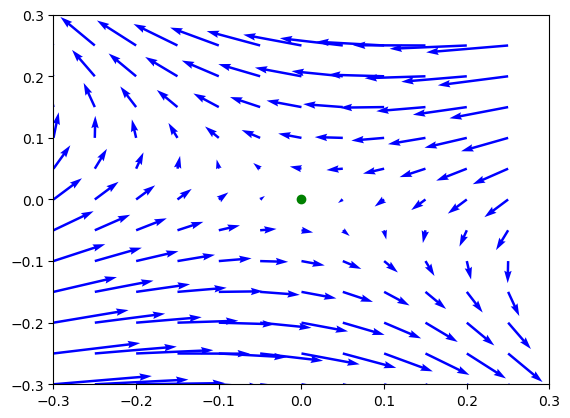

In [204]:
X, Y = np.meshgrid(np.arange(-.3, .3, .05),np.arange(-.3, .3, .05))

for critical_point in critical_points:
    plt.figure()

    xc, yc = critical_point
    point = {x: xc, y: yc}
    jacobian = jacobian_matrix.subs(point)
    AN = np.array(jacobian.evalf().tolist(), dtype=float)
    ((a11, a12), (a21, a22)) = AN

    DX = a11 * X + a12 * Y
    DY = a21 * X + a22 * Y

    plt.quiver(X, Y, DX, DY, color='b',angles='xy', scale_units='xy', scale=22)

    plt.xlim(-.3, .3)
    plt.ylim(-.3, .3)

    plt.plot(0, 0, 'og')
    plt.show
